### 1.1 -  Libraries

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy.stats import norm
from scipy.stats import cauchy

### 1.1.1 - Integrate $\langle r \rangle = \int_0^1 r dr$

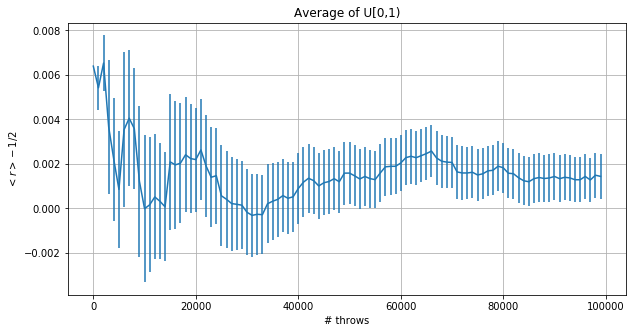

In [7]:
M = 100000     # Throws
N = 100        # Blocks (~ Experiments)
L = int(M/N)   # Rolls per block

datafile = "./data/stats_1.1.1.dat"

avg, err = np.loadtxt(datafile, usecols=(0,2), delimiter=' ', unpack='true')

# Plot (experimental value - expected value) with error bars

x = np.arange(N)
x *= L  # coordinates of each error bar
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, avg-0.5, yerr=err)
plt.xlabel('# throws')
plt.ylabel(r'$<r>-1/2$')
plt.title('Average of U[0,1)')
plt.savefig("./figures/1.1.1.png")
plt.show()

### 1.1.2 - Integrate $\sigma^2 = \int_0^1 (r-1/2)^2 dr$

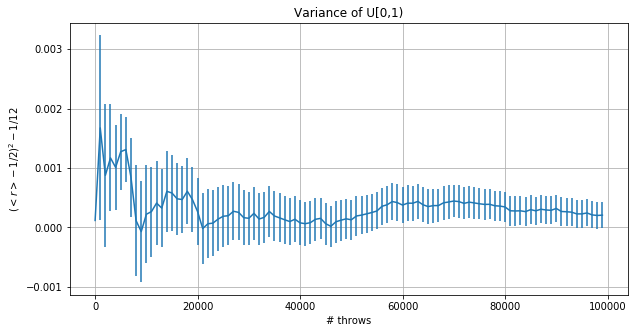

In [8]:
M = 100000     # Throws
N = 100        # Blocks
L = int(M/N)   # Rolls per block

datafile = "./data/stats_1.1.2.dat"
avg, err = np.loadtxt(datafile, usecols=(0,2), delimiter=' ', unpack='true')

# Plot (experimental value - expected value)

x = np.arange(N)
x *= L  
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, avg-1/12, yerr=err)
plt.xlabel('# throws')
plt.ylabel(r'$(<r>-1/2)^2 - 1/12$')
plt.title("Variance of U[0,1)")
plt.savefig("./figures/1.1.2.png")
plt.show()

### 1.1.3 - Run Chi Squared Test

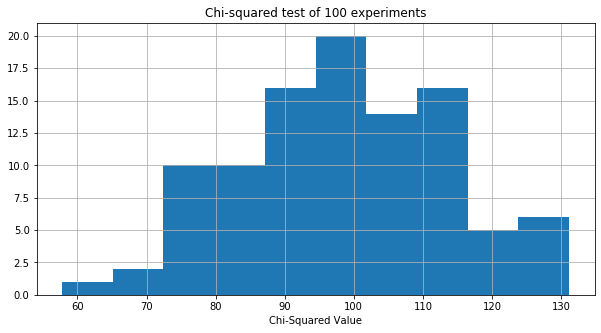

In [9]:
# Chi Squared Test

chi2 = np.loadtxt("./data/stats_1.1.3.dat",usecols=(0), delimiter=' ', unpack='true')

# Plot the results
plt.figure(figsize=(10, 5))
plt.hist(chi2)
# plt.ylabel("Chi-Squared Value - 100")
plt.xlabel("Chi-Squared Value")
plt.title('Chi-squared test of 100 experiments')
plt.grid(True)
plt.savefig("./figures/1.1.3.png")
plt.show()

### 1.2 - Test The Central Limit Theorem for Uniform, Exponential, and Cauchy Distributions

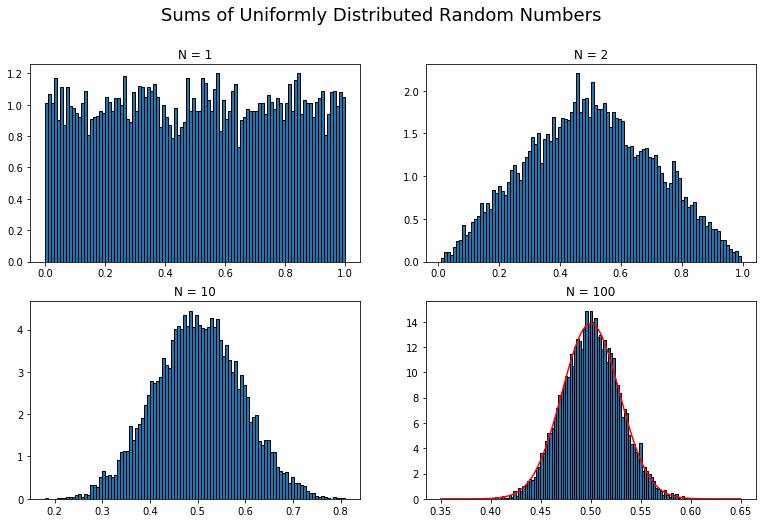

In [10]:
# Uniform Distribution with CLT Test

datafile = "./data/stats_1.2.1.dat"

sums1, sums2, sums10, sums100 = np.loadtxt(
    datafile, usecols=(0, 1, 2, 3), delimiter=' ', unpack='true')

fig, axes = plt.subplots(2, 2, figsize=(13, 8))
fig.suptitle("Sums of Uniformly Distributed Random Numbers",fontsize=18)

axes[0, 0].hist(sums1, bins=100, ec='black', density=True)
axes[0, 0].title.set_text("N = 1")

axes[0, 1].hist(sums2, bins=100, ec='black', density=True)
axes[0, 1].title.set_text("N = 2")

axes[1, 0].hist(sums10, bins=100, ec='black', density=True)
axes[1, 0].title.set_text("N = 10")

axes[1, 1].hist(sums100, bins=100, ec='black', density=True)
axes[1, 1].title.set_text("N = 100")

# plt.tight_layout()

data = sums100
mean, std_dev = norm.fit(data)
x = np.linspace(0.35, 0.65, 100)
gauss_fit = norm.pdf(x, mean, std_dev)
axes[1, 1].plot(x, gauss_fit, color='red')
plt.show()

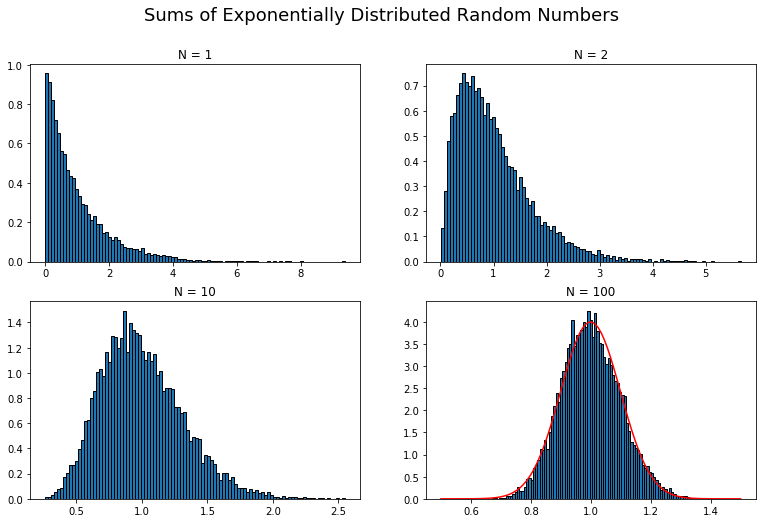

In [11]:
# Exponential Distribution with CLT Test

datafile = "./data/stats_1.2.2.dat"

sums1, sums2, sums10, sums100 = np.loadtxt(
    datafile, usecols=(0, 1, 2, 3), delimiter=' ', unpack='true')

fig, axes = plt.subplots(2, 2, figsize=(13, 8))
fig.suptitle("Sums of Exponentially Distributed Random Numbers",fontsize=18)

axes[0, 0].hist(sums1, bins=100, ec='black', density=True)
axes[0, 0].title.set_text("N = 1")
axes[0, 1].hist(sums2, bins=100, ec='black', density=True)
axes[0, 1].title.set_text("N = 2")

axes[1, 0].hist(sums10, bins=100, ec='black', density=True)
axes[1, 0].title.set_text("N = 10")
axes[1, 1].hist(sums100, bins=100, ec='black', density=True)
axes[1, 1].title.set_text("N = 100")

data = sums100
mean, std_dev = norm.fit(data)
x = np.linspace(0.5, 1.5, 100)
gauss_fit = norm.pdf(x, mean, std_dev)
axes[1, 1].plot(x, gauss_fit, color='red')
plt.show()

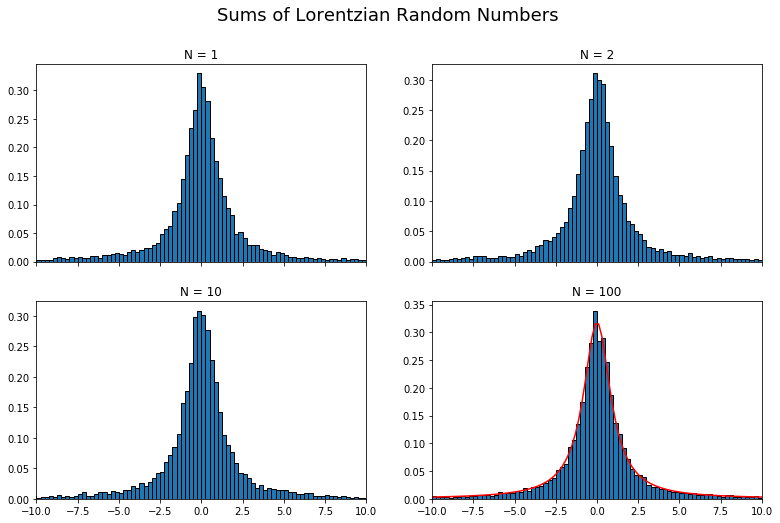

In [12]:
# The Cauchy-Lorentz Distribution, a stable distribution

datafile = "./data/stats_1.2.3.dat"

sums1, sums2, sums10, sums100 = np.loadtxt(
    datafile, usecols=(0, 1, 2, 3), delimiter=' ', unpack='true')

sums1 = np.clip(sums1, -25, 25)
sums2 = np.clip(sums2, -25, 25)
sums10 = np.clip(sums10, -25, 25)
sums100 = np.clip(sums100, -25, 25)

fig, axes = plt.subplots(2, 2, figsize=(13, 8), sharex=True)
fig.suptitle("Sums of Lorentzian Random Numbers",fontsize=18)

axes[0, 0].hist(sums1, bins=200, ec='black', density=True)
axes[0, 0].title.set_text("N = 1")
axes[0, 0].set_xlim([-10, 10])

axes[0, 1].hist(sums2, bins=200, ec='black', density=True)
axes[0, 1].title.set_text("N = 2")
axes[0, 1].set_xlim([-10, 10])

axes[1, 0].hist(sums10, bins=200, ec='black', density=True)
axes[1, 0].title.set_text("N = 10")
axes[1, 0].set_xlim([-10, 10])

axes[1, 1].hist(sums100, bins=200, ec='black', density=True)
axes[1, 1].title.set_text("N = 100")
axes[1, 1].set_xlim([-10, 10])

# Is this a true fit? I'm not using any parameters...

x = np.linspace(-10, 10, 100)
cauchy_fit = cauchy.pdf(x)
axes[1, 1].plot(x, cauchy_fit, color='red')

plt.show()

### 1.3 - Simulate the Buffon Experiment 

Final estimate for pi: 3.14396 +/- 0.001553 ( 0.049382 % )


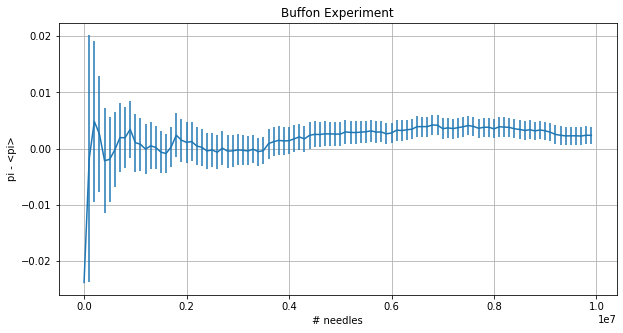

In [13]:
datafile = "./data/stats_1.3.dat"
pi_est, err = np.loadtxt(datafile, usecols=(0,2), delimiter=' ', unpack='true')

pi_result = pi_est[99]
pi_error = err[99]
pi_perror = round(pi_error/pi_result * 100,6)
pi_error = round(err[99],6)
print('Final estimate for pi:', pi_result,
      '+/-', pi_error, '(', pi_perror, '% )')

x = np.arange(100)
x *= int(10000000/100)
plt.figure(figsize=(10, 5))
plt.errorbar(x, pi_est-np.pi, yerr=err)
plt.xlabel('# needles')
plt.ylabel('pi - <pi>')
plt.title("Buffon Experiment")
plt.grid(True)
plt.savefig("./figures/pi.png")